In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import matplotlib.dates as mdates
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import numpy as np

In [50]:
plt.style.use('seaborn')

In [51]:
def add_days_to_date(date, days):
    """Add days to a date and return the date.
    
    Args: 
        date (string): Date string in YYYY-MM-DD format. 
        days (int): Number of days to add to date
    
    Returns: 
        date (date): Date in YYYY-MM-DD with X days added. 
    """
    
    added_date = pd.to_datetime(date) + timedelta(days=days)

    return added_date

In [52]:
def getImage(path):
    
    return OffsetImage(plt.imread(path), zoom=.1)

In [53]:
matches = pd.read_csv('usmnt_matches.csv', header=0)

In [54]:
flag_codes = pd.read_json('./country-flags-main/countries.json', typ='series')

In [55]:
#pd.value_counts(matches['Opponent'])

In [56]:
for code in flag_codes:
    print(code)

Andorra
United Arab Emirates
Afghanistan
Antigua and Barbuda
Anguilla
Albania
Armenia
Angola
Antarctica
Argentina
American Samoa
Austria
Australia
Aruba
Åland Islands
Azerbaijan
Bosnia and Herzegovina
Barbados
Bangladesh
Belgium
Burkina Faso
Bulgaria
Bahrain
Burundi
Benin
Saint Barthélemy
Bermuda
Brunei Darussalam
Bolivia, Plurinational State of
Caribbean Netherlands
Brazil
Bahamas
Bhutan
Bouvet Island
Botswana
Belarus
Belize
Canada
Cocos (Keeling) Islands
Congo, the Democratic Republic of the
Central African Republic
Republic of the Congo
Switzerland
Côte d'Ivoire
Cook Islands
Chile
Cameroon
China (People's Republic of China)
Colombia
Costa Rica
Cuba
Cape Verde
Curaçao
Christmas Island
Cyprus
Czech Republic
Germany
Djibouti
Denmark
Dominica
Dominican Republic
Algeria
Ecuador
Estonia
Egypt
Western Sahara
Eritrea
Spain
Ethiopia
Europe
Finland
Fiji
Falkland Islands (Malvinas)
Micronesia, Federated States of
Faroe Islands
France
Gabon
England
Northern Ireland
Scotland
Wales
United Kingdom

In [57]:
for ind, val in enumerate(matches['Date']):
    
    matches.loc[ind, 'Date'] = add_days_to_date('1900-01-01', val)

In [58]:
for ind, val in enumerate(matches['Opponent']):
    
    #print(val)
    
    flag_code = flag_codes[flag_codes == val].index[0]
    flag_code = flag_code.lower()
    
    matches.loc[ind, 'Opp Flag Path'] = f'./country-flags-main/png100px/{flag_code}.png'


In [59]:
matches

,Date,Opponent,Location,USMNT Pre-Match Elo,USMNT Post-Match Elo,Opp Pre-Match Elo,Elo Diff,Modified Elo,GF,GA,GD,xGF,xGA,xGD,A Team?,Opp Flag Path
0,2023-10-19 00:00:00,Ghana,1,1801,1806,1584,217,317,4,0,4,NaN,NaN,NaN,Y,./country-flags-main/png100px/gh.png
1,2023-10-16 00:00:00,Germany,1,1817,1801,1903,-86,14,1,3,-2,0.26,3.15,NaN,Y,./country-flags-main/png100px/de.png
2,2023-09-14 00:00:00,Oman,1,1812,1817,1578,234,334,4,0,4,1.63,0.16,NaN,Y,./country-flags-main/png100px/om.png
3,2023-09-11 00:00:00,Uzbekistan,1,1807,1812,1602,205,305,3,0,3,2.50,0.75,NaN,N,./country-flags-main/png100px/uz.png
4,2023-07-14 00:00:00,Panama,1,1821,1807,1693,128,228,1,1,0,1.55,1.45,NaN,N,./country-flags-main/png100px/pa.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,1999-03-15 00:00:00,Mexico,1,1739,1726,1878,-139,-39,1,2,-1,NaN,NaN,NaN,Y,./country-flags-main/png100px/mx.png
408,1999-03-13 00:00:00,Guatemala,1,1733,1739,1516,217,317,0,0,0,NaN,NaN,NaN,Y,./country-flags-main/png100px/gt.png
409,1999-02-23 00:00:00,Chile,1,1725,1733,1754,-29,71,2,1,1,NaN,NaN,NaN,Y,./country-flags-main/png100px/cl.png
410,1999-02-08 00:00:00,Germany,1,1699,1725,1978,-279,-179,3,0,3,NaN,NaN,NaN,Y,./country-flags-main/png100px/de.png


In [60]:
a_team = matches[matches['A Team?'] == 'Y']

In [61]:
b_team = matches[matches['A Team?'] == 'N']

In [62]:
matches_2020s = matches[matches['Date'] > pd.to_datetime("2020-01-01")]

a_team_2020s = matches_2020s[matches_2020s['A Team?'] == 'Y']
b_team_2020s = matches_2020s[matches_2020s['A Team?'] == 'N']

In [63]:
matches_2010s = matches[(matches['Date'] > pd.to_datetime("2010-01-01")) & (matches['Date'] < pd.to_datetime("2020-01-01"))]

In [64]:
matches_2000s = matches[(matches['Date'] > pd.to_datetime("2000-01-01")) & (matches['Date'] < pd.to_datetime("2010-01-01"))]

In [65]:
future_dates = np.array([pd.to_datetime("2023-10-17"),
                         pd.to_datetime("2023-11-17"),
                         pd.to_datetime("2023-11-21")])
                        
future_high_elos = np.array([1806, 1810, 1819])

future_low_elos = np.array([1806, 1742, 1692])
                        

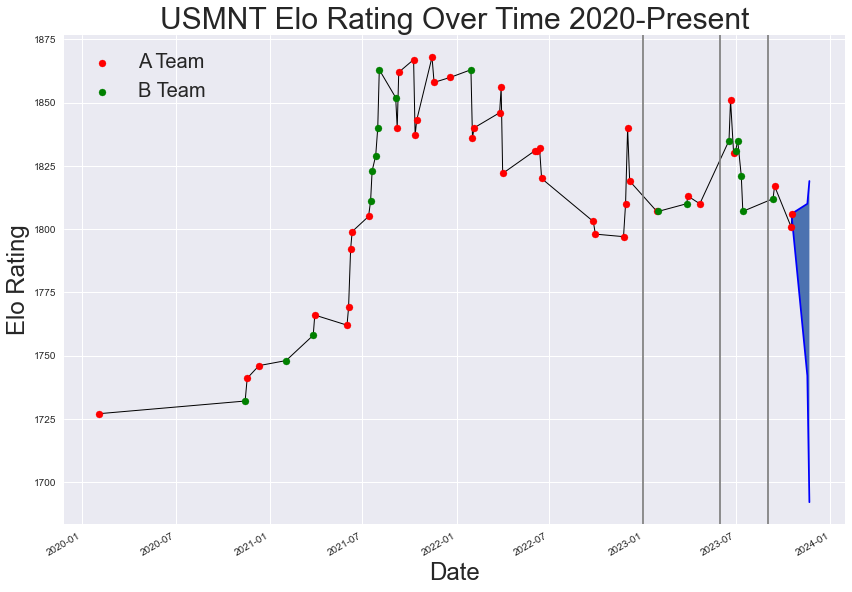

In [66]:
fix, ax = plt.subplots(figsize=(14,10), facecolor='white')

ax.plot(matches_2020s['Date'], matches_2020s['USMNT Post-Match Elo'], lw=1, c='k')
ax.scatter(a_team_2020s['Date'], a_team_2020s['USMNT Post-Match Elo'], c='r', zorder=10, label='A Team')
ax.scatter(b_team_2020s['Date'], b_team_2020s['USMNT Post-Match Elo'], c='g', zorder=10, label='B Team')
ax.plot(future_dates, future_high_elos, c='b')
ax.plot(future_dates, future_low_elos, c='b')
ax.fill_between(future_dates, future_high_elos, future_low_elos)

plt.gcf().autofmt_xdate()

ax.set_xlabel('Date', fontsize=24)
ax.set_ylabel('Elo Rating', fontsize=24)

ax.axvline(pd.to_datetime("2023-01-01"), c='gray')
ax.axvline(pd.to_datetime("2023-05-30"), c='gray')
ax.axvline(pd.to_datetime("2023-09-01"), c='gray')

ax.set_title('USMNT Elo Rating Over Time 2020-Present', fontsize=30)

ax.legend(fontsize=20, loc='upper left')

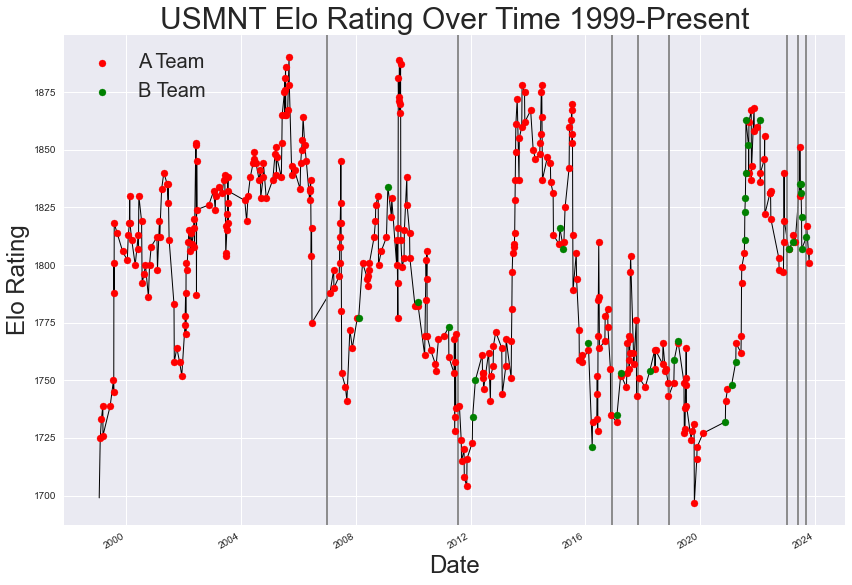

In [67]:
fix, ax = plt.subplots(figsize=(14,10), facecolor='white')

ax.plot(matches['Date'], matches['USMNT Post-Match Elo'], lw=1, c='k')
ax.scatter(a_team['Date'], a_team['USMNT Post-Match Elo'], c='r', zorder=10, label='A Team')
ax.scatter(b_team['Date'], b_team['USMNT Post-Match Elo'], c='g', zorder=10, label='B Team')

plt.gcf().autofmt_xdate()

ax.set_xlabel('Date', fontsize=24)
ax.set_ylabel('Elo Rating', fontsize=24)

ax.axvline(pd.to_datetime("2007-01-01"), c='gray')
ax.axvline(pd.to_datetime("2011-07-29"), c='gray')
ax.axvline(pd.to_datetime("2016-12-01"), c='gray')
ax.axvline(pd.to_datetime("2017-11-01"), c='gray')
ax.axvline(pd.to_datetime("2018-12-02"), c='gray')
ax.axvline(pd.to_datetime("2023-01-01"), c='gray')
ax.axvline(pd.to_datetime("2023-05-30"), c='gray')
ax.axvline(pd.to_datetime("2023-09-01"), c='gray')

ax.set_title('USMNT Elo Rating Over Time 1999-Present', fontsize=30)

ax.legend(fontsize=20, loc='upper left')

Text(0.5, 1.0, 'USMNT Elo Rating Over Time 2000-Present')

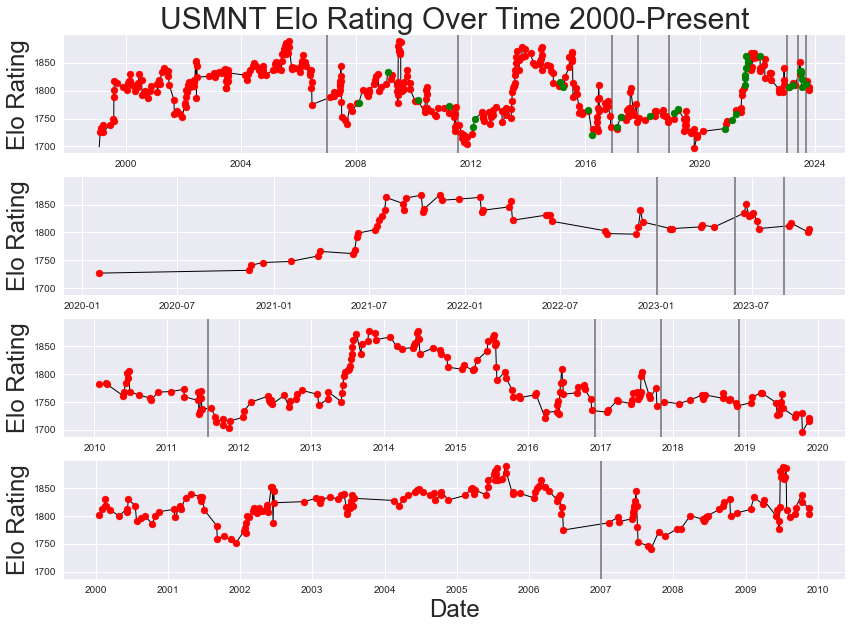

In [68]:
fix, ax = plt.subplots(4, 1, figsize=(14,10), sharey=True, facecolor='white')

ax[0].plot(matches['Date'], matches['USMNT Post-Match Elo'], lw=1, c='k')
ax[0].scatter(a_team['Date'], a_team['USMNT Post-Match Elo'], c='r', zorder=10, label='A Team')
ax[0].scatter(b_team['Date'], b_team['USMNT Post-Match Elo'], c='g', zorder=10, label='B Team')

#ax[0].set_xlabel('Date', fontsize=24)
ax[0].set_ylabel('Elo Rating', fontsize=24)

ax[1].plot(matches_2020s['Date'], matches_2020s['USMNT Post-Match Elo'], lw=1, c='k')
ax[1].scatter(matches_2020s['Date'], matches_2020s['USMNT Post-Match Elo'], c='r', zorder=10, label='A Team')

#ax[1].set_xlabel('Date', fontsize=24)
ax[1].set_ylabel('Elo Rating', fontsize=24)

ax[2].plot(matches_2010s['Date'], matches_2010s['USMNT Post-Match Elo'], lw=1, c='k')
ax[2].scatter(matches_2010s['Date'], matches_2010s['USMNT Post-Match Elo'], c='r', zorder=10, label='A Team')

#ax[2].set_xlabel('Date', fontsize=24)
ax[2].set_ylabel('Elo Rating', fontsize=24)

ax[3].plot(matches_2000s['Date'], matches_2000s['USMNT Post-Match Elo'], lw=1, c='k')
ax[3].scatter(matches_2000s['Date'], matches_2000s['USMNT Post-Match Elo'], c='r', zorder=10, label='A Team')

ax[3].set_xlabel('Date', fontsize=24)
ax[3].set_ylabel('Elo Rating', fontsize=24)

#plt.gcf().autofmt_xdate()

ax[0].axvline(pd.to_datetime("2007-01-01"), c='gray')
ax[0].axvline(pd.to_datetime("2011-07-29"), c='gray')
ax[0].axvline(pd.to_datetime("2016-12-01"), c='gray')
ax[0].axvline(pd.to_datetime("2017-11-01"), c='gray')
ax[0].axvline(pd.to_datetime("2018-12-02"), c='gray')
ax[0].axvline(pd.to_datetime("2023-01-01"), c='gray')
ax[0].axvline(pd.to_datetime("2023-05-30"), c='gray')
ax[0].axvline(pd.to_datetime("2023-09-01"), c='gray')

ax[1].axvline(pd.to_datetime("2023-01-01"), c='gray')
ax[1].axvline(pd.to_datetime("2023-05-30"), c='gray')
ax[1].axvline(pd.to_datetime("2023-09-01"), c='gray')

ax[2].axvline(pd.to_datetime("2011-07-29"), c='gray')
ax[2].axvline(pd.to_datetime("2016-12-01"), c='gray')
ax[2].axvline(pd.to_datetime("2017-11-01"), c='gray')
ax[2].axvline(pd.to_datetime("2018-12-02"), c='gray')

ax[3].axvline(pd.to_datetime("2007-01-01"), c='gray')

ax[0].set_title('USMNT Elo Rating Over Time 2000-Present', fontsize=30)

#ax.legend(fontsize=20, loc='lower right')

Text(0.5, 1.0, 'USMNT vs Opponent Elo Rating')

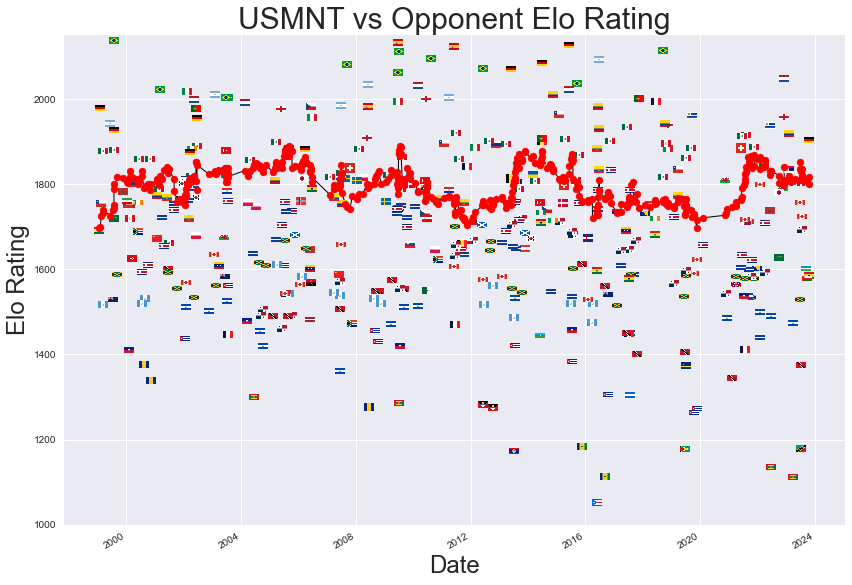

In [69]:
fix, ax = plt.subplots(figsize=(14,10), facecolor='white')

ax.plot(matches['Date'], matches['USMNT Pre-Match Elo'], lw=1, c='k')
ax.scatter(matches['Date'], matches['USMNT Pre-Match Elo'], c='r', zorder=10, label='US Elo')

for x0, y0, path in zip(matches['Date'], matches['Opp Pre-Match Elo'], matches['Opp Flag Path']):

    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

plt.gcf().autofmt_xdate()

ax.set_xlabel('Date', fontsize=24)
ax.set_ylabel('Elo Rating', fontsize=24)

ax.set_ylim(1000, 2150)

ax.set_title('USMNT vs Opponent Elo Rating', fontsize=30)

#ax.legend(fontsize=20, loc='lower right')

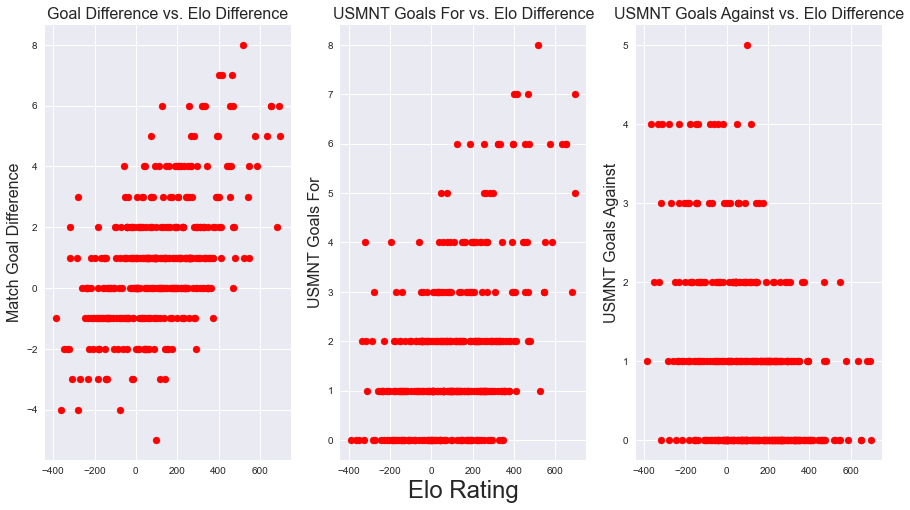

In [70]:
fix, ax = plt.subplots(1, 3, figsize=(15,8), facecolor='white')

ax[0].scatter(matches['Elo Diff'], matches['GD'], c='r', zorder=10)
ax[1].scatter(matches['Elo Diff'], matches['GF'], c='r', zorder=10)
ax[2].scatter(matches['Elo Diff'], matches['GA'], c='r', zorder=10)

ax[0].set_ylabel('Match Goal Difference', fontsize=16)
ax[1].set_ylabel('USMNT Goals For', fontsize=16)
ax[2].set_ylabel('USMNT Goals Against', fontsize=16)
ax[1].set_xlabel('Elo Rating', fontsize=24)

ax[0].set_title('Goal Difference vs. Elo Difference', fontsize=16)
ax[1].set_title('USMNT Goals For vs. Elo Difference', fontsize=16)
ax[2].set_title('USMNT Goals Against vs. Elo Difference', fontsize=16)
ax[0].grid(visible=True)

#ax[0].legend(fontsize=20, loc='lower right')

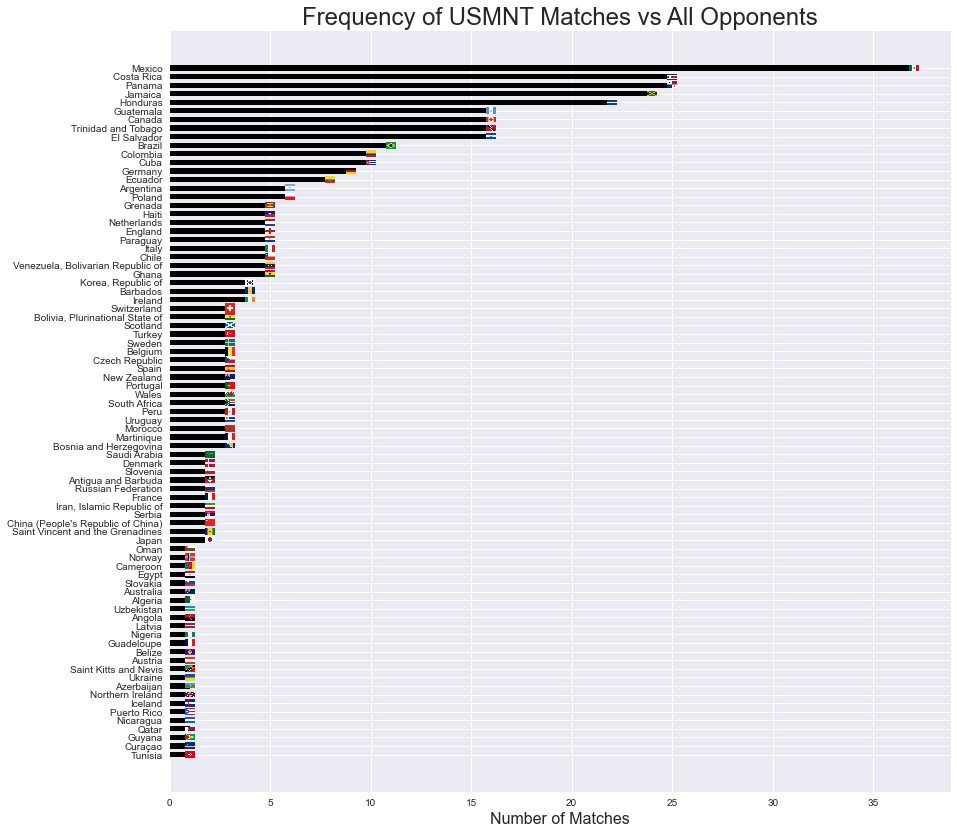

In [71]:
opp_counts = matches['Opponent'].value_counts()

opp_counts_paths = matches['Opp Flag Path'].value_counts()

fig, ax = plt.subplots(figsize=(14,14), facecolor='white')

ypos = np.arange(len(opp_counts))

for x0, y0, path in zip(ypos, opp_counts, opp_counts_paths.index):

    ab = AnnotationBbox(getImage(path), (y0, x0), frameon=False)
    ax.add_artist(ab)

ax.barh(ypos, opp_counts, height=0.6, color='black')

ax.set_title('Frequency of USMNT Matches vs All Opponents', fontsize=24)
ax.set_xlabel('Number of Matches', fontsize=16)

ax.set_yticks(ypos, labels=opp_counts.index)
ax.invert_yaxis()

plt.show()